<font size="5">**This script shows how to use the pre-defined sharpening functions (TsHARP, HUTS, ATPRK and AATPRK) of the Thunmpy package.**<font>

Detailed information on these super-resolution methods can be found in Granero-Belinchon, C.; Michel, A.; Lagouarde, J.-P.; Sobrino, J.A.; Briottet, X. Multi-Resolution Stufrom osgeo import gdal
import numpy as np
import matplotlib.pyplot as pltdy of Thermal Unmixing Techniques over Madrid Urban Area: Case Study of TRISHNA Mission. Remote Sens. 2019, 11, 1251. https://doi.org/10.3390/rs11101251 

Each function contains some explanation of the needed inputs and outputs.

In [1]:
# Loading Packages
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

<font size="3">**1. TsHARP**<font>

We start by loading the needed data, i.e. a) coarse resolution LST, coarse resolution VNIR-SWIR index and high resolution VNIR-SWIR index

In [ ]:
################### Paths to files #################################

path_index_h = 'Images/NDBI_20m.img'
path_index_c = 'Images/NDBI_100m.img'
path_temperature_c = 'Images/LST_100m.img'

################### Temperature ######################################
    
# Reading temperature data
filename = path_temperature_c
dataset = gdal.Open(filename)
cols = dataset.RasterXSize #Spatial dimension x
rows = dataset.RasterYSize #Spatial dimension y
    
# Read as array
T_C= dataset.ReadAsArray(0, 0, cols, rows).astype(np.float)

Additional inputs are: a) the upscaling ratio here =5 , b) the min_T taken into account in the fit and c) the path_image which is only needed if we want to save the upscaled LST in a file.

In [3]:
ratio=5
tmin=290
path=False  # We don't save any image, if an image is saved then projection and georeferencing is taking from I_H image.

In [4]:
from Thunmpy import Methods

In [5]:
T_H_corrected = Methods.TsHARP(path_temperature_c, path_index_c, path_index_h, ratio, tmin, path)

Fit Done
Unmixing Done
Correction Done
TsHARP Done


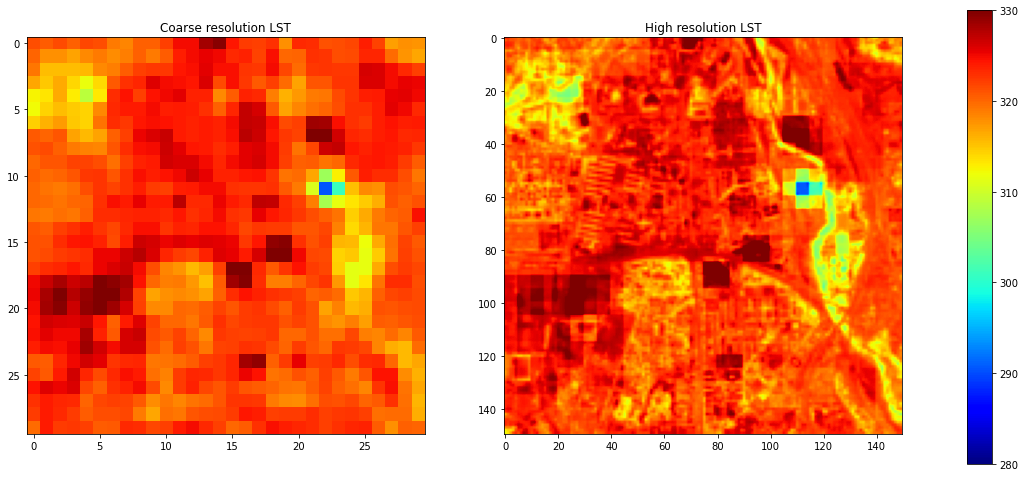

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18, 9))

ax0.set_title('Coarse resolution LST')
ax0.imshow(T_C, vmin=280, vmax=330, cmap='jet')

ax1.set_title('High resolution LST')
img=ax1.imshow(T_H_corrected, vmin=280, vmax=330, cmap='jet')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar=fig.colorbar(img, cax=cbar_ax)

plt.show()

<font size="3">**2. ATPRK**<font>

We start by loading the needed data, i.e. a) coarse resolution LST, coarse resolution VNIR-SWIR index and high resolution VNIR-SWIR index

In [12]:
################### Paths to files #################################

path_index_h = 'Images/NDBI_20m.img'
path_index_c = 'Images/NDBI_100m.img'
path_temperature_c = 'Images/LST_100m.img'

Additional inputs are: a) the upscaling ratio here =5 , b) the coarse resolution, c) the size of the sliding window used in residual correction, e) sill parameter in residual correction, f) ran parameter in residual correction, g) the min_T taken into account in the fit and f) the path_image which is only needed if we want to save the upscaled LST in a file.

In [13]:
ratio=5 # upscaling ratio
coarse_reso=100 # coarse pixel resolution
block_s=5 # block size
s=7
r=1000
tmin=290 # Minimum LST taken into account
path=False  # We don't save any image, if an image is saved then projection and georeferencing is taking from I_H image.

In [ ]:
T_H_corrected = Methods.ATPRK(path_temperature_c, path_index_c, path_index_h, ratio, coarse_reso, block_s, s, r, tmin, path)

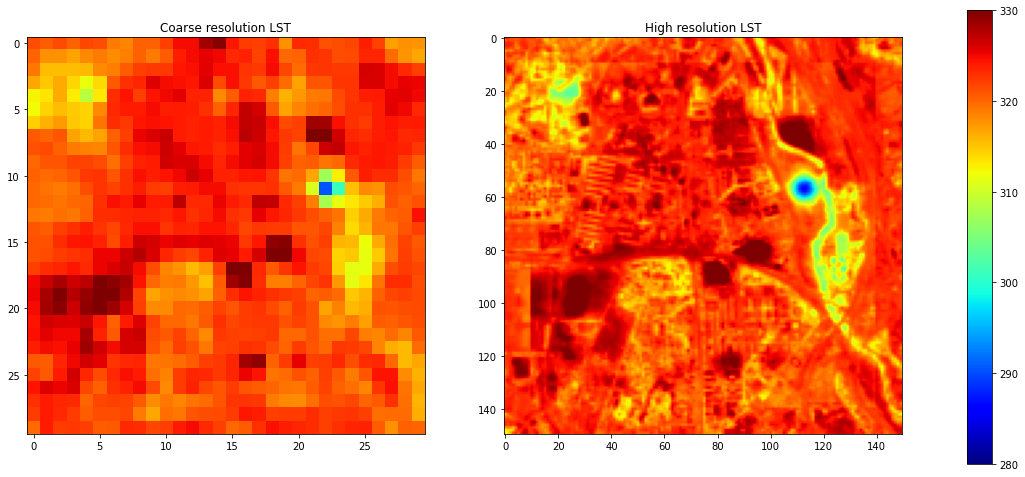

In [11]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18, 9))

ax0.set_title('Coarse resolution LST')
ax0.imshow(T_C, vmin=280, vmax=330, cmap='jet')

ax1.set_title('High resolution LST')
img=ax1.imshow(T_H_corrected, vmin=280, vmax=330, cmap='jet')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar=fig.colorbar(img, cax=cbar_ax)

plt.show()

<font size="3">**3. AATPRK**<font>

We start by loading the needed data, i.e. a) coarse resolution LST, coarse resolution VNIR-SWIR index and high resolution VNIR-SWIR index

In [14]:
################### Paths to files #################################

path_index_h = 'Images/NDBI_20m.img'
path_index_c = 'Images/NDBI_100m.img'
path_temperature_c = 'Images/LST_100m.img'

Additional inputs are: a) the upscaling ratio here =5 , b) the coarse resolution, c) the size of the sliding window used in fit, d) the size of the sliding window used in residual correction, e) sill parameter in residual correction, f) ran parameter in residual correction, g) the min_T taken into account in the fit and h) the path_image which is only needed if we want to save the upscaled LST in a file.

In [15]:
ratio=5 # upscaling ratio
coarse_reso=100 # coarse pixel resolution
b_r=2
block_s=5 # block size
s=7
r=1000
tmin=290 # Minimum LST taken into account
path=False  # We don't save any image, if an image is saved then projection and georeferencing is taking from I_H image.

In [16]:
T_H_corrected = Methods.AATPRK(path_temperature_c, path_index_c, path_index_h, ratio, coarse_reso, b_r, block_s, s, r, tmin, path)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 Fit Done
Unmixing Done
Correction Done
AATPRK Done


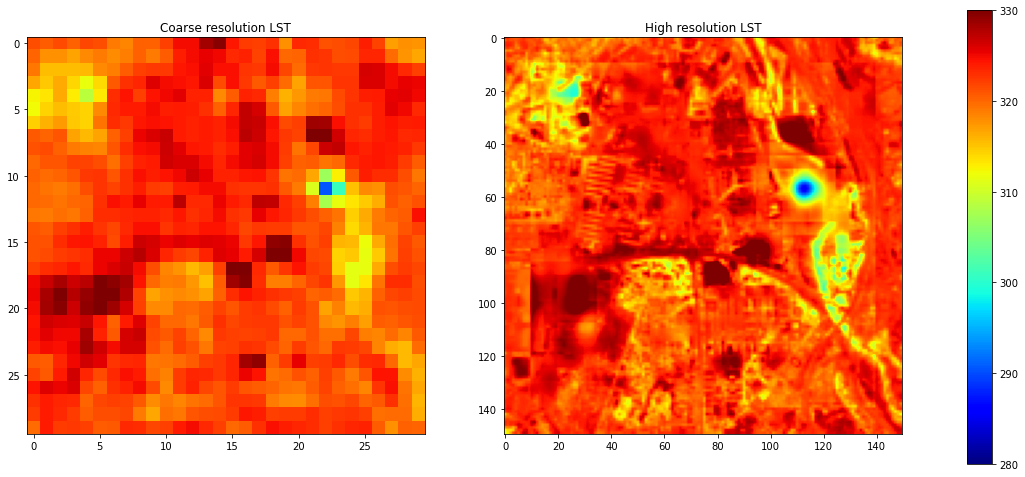

In [17]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18, 9))

ax0.set_title('Coarse resolution LST')
ax0.imshow(T_C, vmin=280, vmax=330, cmap='jet')

ax1.set_title('High resolution LST')
img=ax1.imshow(T_H_corrected, vmin=280, vmax=330, cmap='jet')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar=fig.colorbar(img, cax=cbar_ax)

plt.show()

<font size="3">**4. HUTS**<font>

We start by loading the needed data, i.e. a) coarse resolution LST, b) two coarse resolution VNIR-SWIR indices and c) two high resolution VNIR-SWIR indices

In [18]:
################### Paths to files #################################

path_index_h = 'Images/NDBI_20m.img'
path_index_c = 'Images/NDBI_100m.img'
path_index2_h = 'Images/NDBI_20m.img'
path_index2_c = 'Images/NDBI_100m.img'
path_temperature_c = 'Images/LST_100m.img'

Additional inputs are: a) the upscaling ratio here =5 , b) the min_T taken into account in the fit and c) the min and max accepted LSTs in the residual correction and d) the path_image which is only needed if we want to save the upscaled LST in a file.

In [19]:
ratio=5 # upscaling ratio
tmin=290 # Minimum LST taken into account
thre_min=263 # minimum accepted temperature in residual correction
thre_max=323 # maximum accepted temperature in residual correction
p=False # Initial guess for fit parameters optimization. if False then all parameters are initialized as 1
path=False  # We don't save any image, if an image is saved then projection and georeferencing is taking from I_H image.

In [20]:
T_H_corrected = Methods.HUTS(path_temperature_c, path_index_c, path_index_h, path_index2_c, path_index2_h, ratio, tmin, thre_min, thre_max, p, path)

Fit Done
Unmixing Done
Correction Done
HUTS Done


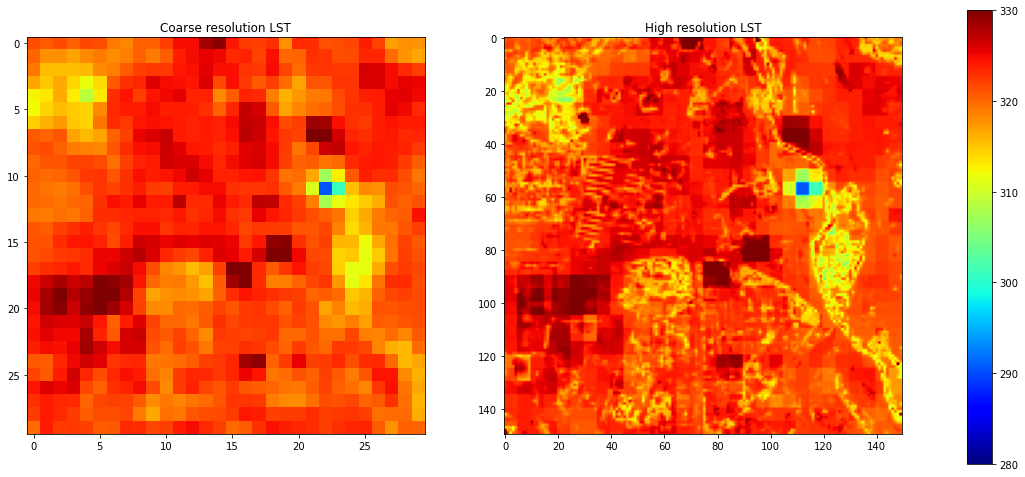

In [21]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18, 9))

ax0.set_title('Coarse resolution LST')
ax0.imshow(T_C, vmin=280, vmax=330, cmap='jet')

ax1.set_title('High resolution LST')
img=ax1.imshow(T_H_corrected, vmin=280, vmax=330, cmap='jet')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar=fig.colorbar(img, cax=cbar_ax)

plt.show()